## Import librarires

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load all data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train_copy = train.copy()
train_copy.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
# Train Data
print("Train Data")
print(f"Total number of rows: {len(train)}")
print(f"Total number of columns: {train.shape[1]}\n")


Train Data
Total number of rows: 20758
Total number of columns: 18



In [6]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [7]:
(train_copy.isnull().sum()/len(train_copy))*100

id                                0.0
Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS                            0.0
NObeyesdad                        0.0
dtype: float64

In [8]:
#checking unique values in each column
for column in train_copy.columns:
    print(f'{column}: {train_copy[column].nunique()}',"\n")

id: 20758 

Gender: 2 

Age: 1703 

Height: 1833 

Weight: 1979 

family_history_with_overweight: 2 

FAVC: 2 

FCVC: 934 

NCP: 689 

CAEC: 4 

SMOKE: 2 

CH2O: 1506 

SCC: 2 

FAF: 1360 

TUE: 1297 

CALC: 3 

MTRANS: 5 

NObeyesdad: 7 



In [9]:
train_copy.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [10]:
#create a copy to drop id and chedck duplicate
copy_t= train.copy()
copy_t.drop(['id'], axis=1)
copy_t.duplicated().sum()

0

In [11]:
#deviding train_data to features and target
X = train_copy.iloc[:,:-1]
y = train_copy.iloc[:,-1]
X.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation


In [15]:
y.value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

## EDA

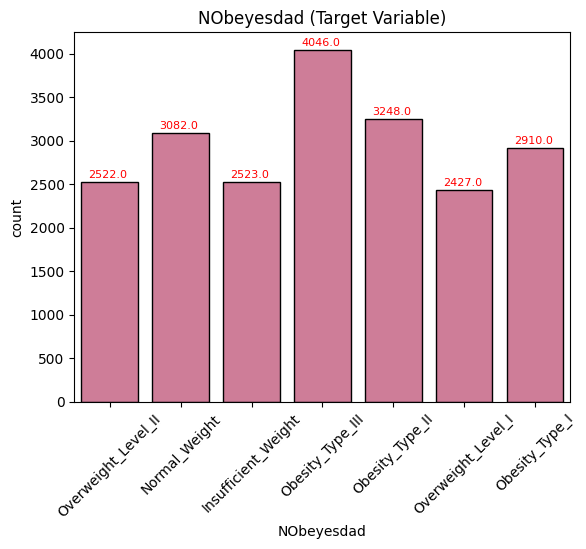

In [27]:
ax = sns.countplot(x='NObeyesdad', data=train_copy,color='#DB7093',edgecolor='black')
plt.title('NObeyesdad (Target Variable)')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+50), fontsize=8, color='red')
plt.show()

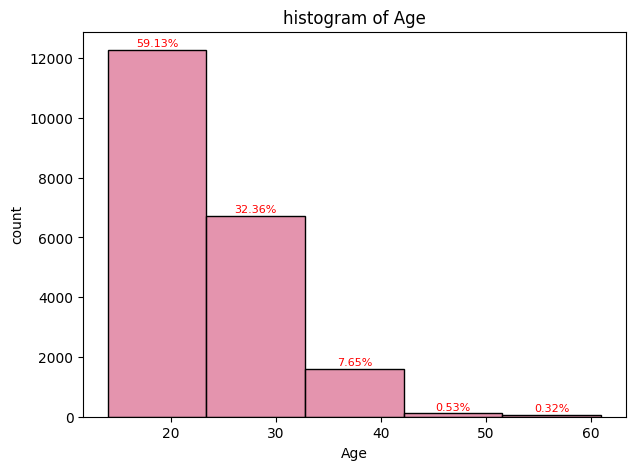

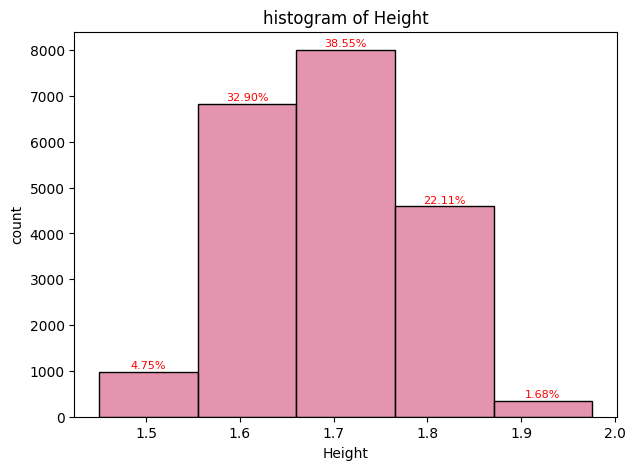

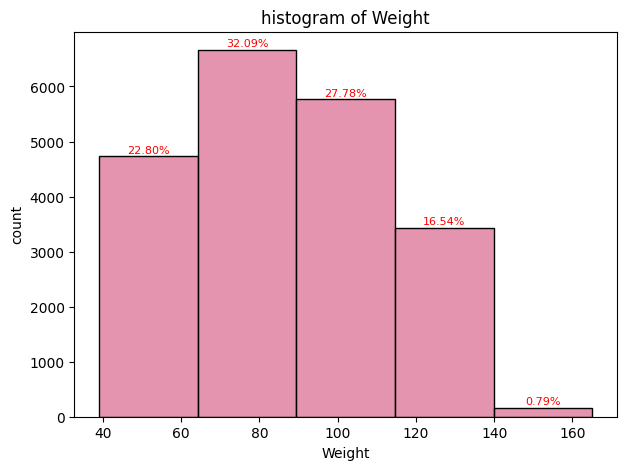

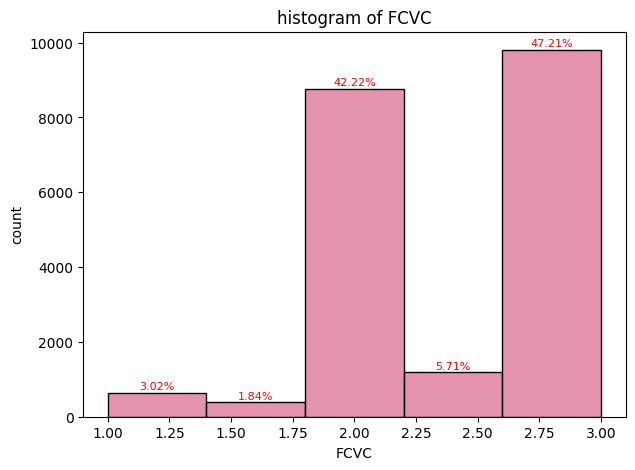

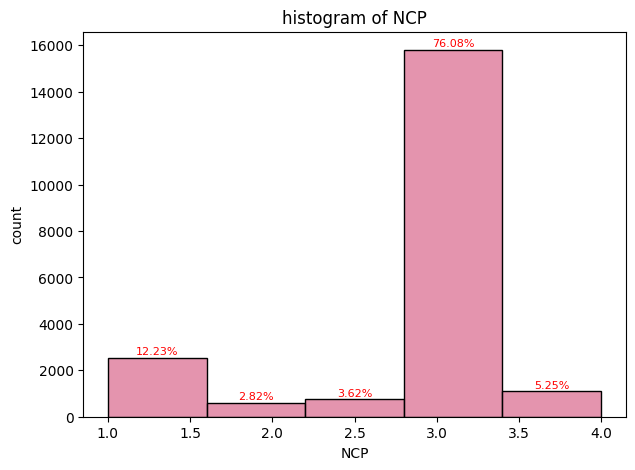

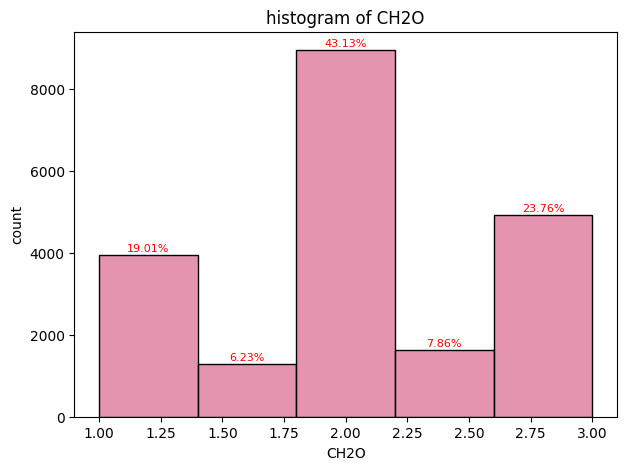

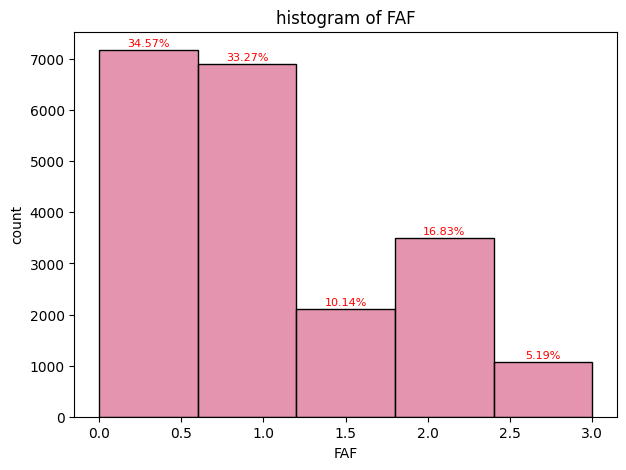

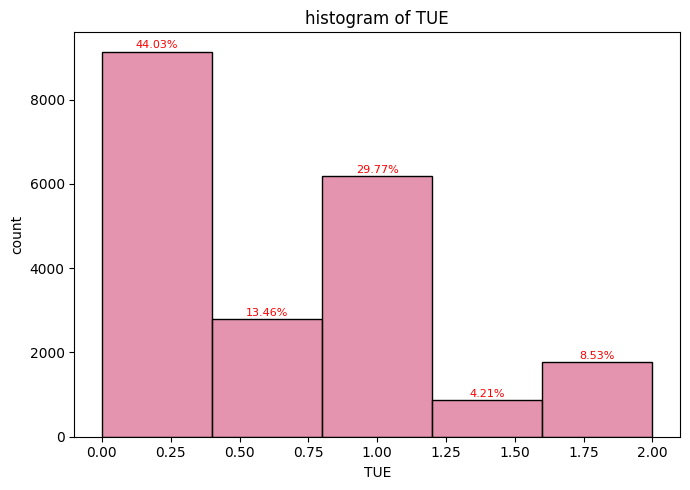

In [12]:
# Ploting histograms for each of  the numerical columns
num_columns = train_copy.select_dtypes(include='float')


for column in num_columns:
    plt.figure(figsize=(7, 5))
    sns.histplot(num_columns[column], bins=5, kde=False, color='#DB7093', edgecolor='black')
    plt.xlabel(f'{column}')
    plt.ylabel('count')
    plt.title(f'histogram of {column}')
    
    num_bins = 5    
    hist, bins = np.histogram(num_columns[column], bins=num_bins)
    percentages = (hist / len(num_columns[column])) * 100



    for count, binEdge, percentage in zip(hist,bins[:-1], percentages):
        plt.annotate(f'{percentage:.2f}%', xy=(binEdge + np.diff(bins)[0] / 2, count), xytext=(0, 1),
                     textcoords='offset points', ha='center', va='bottom', fontsize=8, color='red')

plt.tight_layout()
plt.show()


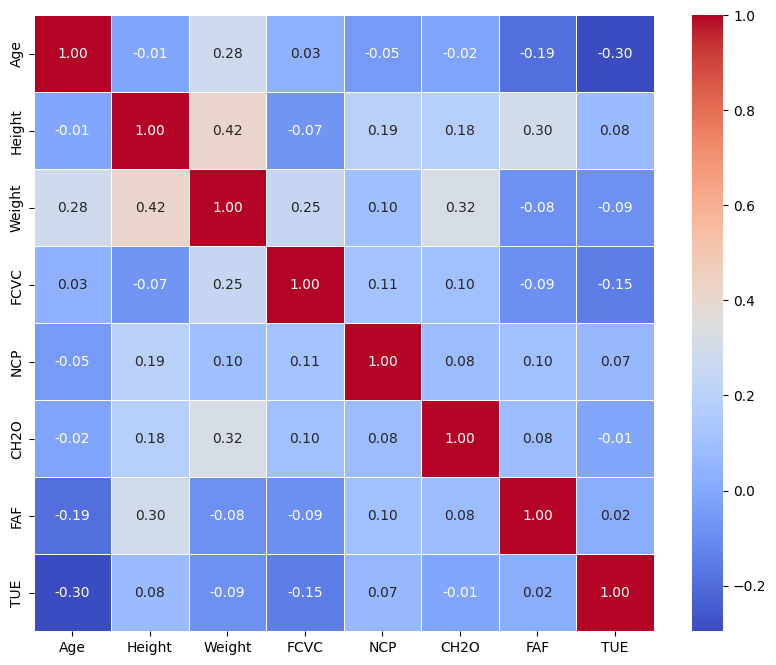

In [13]:
corr_matrix = num_columns.corr()

# Ploting  heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 2500x800 with 0 Axes>

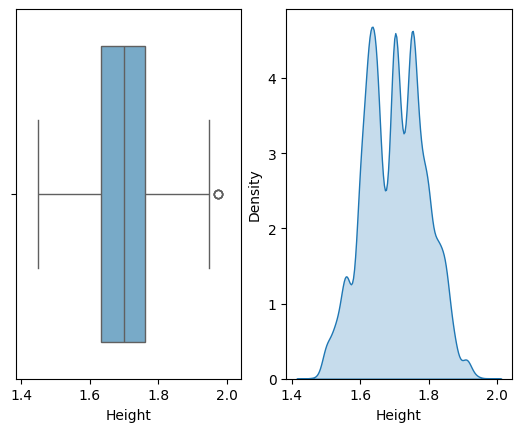

<Figure size 640x480 with 0 Axes>

<Figure size 2500x800 with 0 Axes>

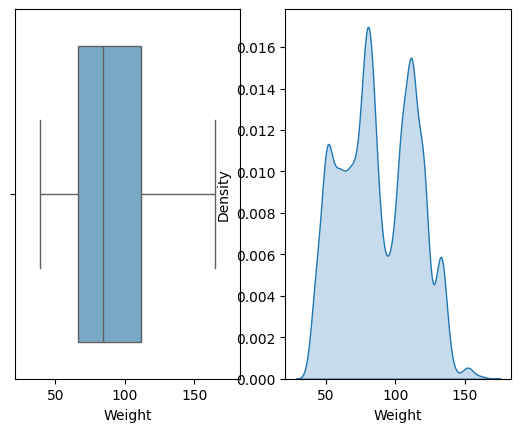

<Figure size 640x480 with 0 Axes>

<Figure size 2500x800 with 0 Axes>

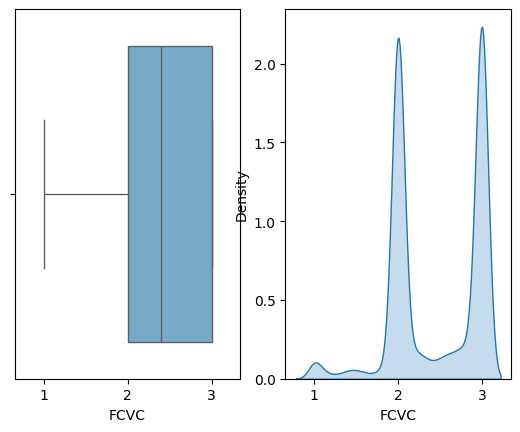

<Figure size 640x480 with 0 Axes>

<Figure size 2500x800 with 0 Axes>

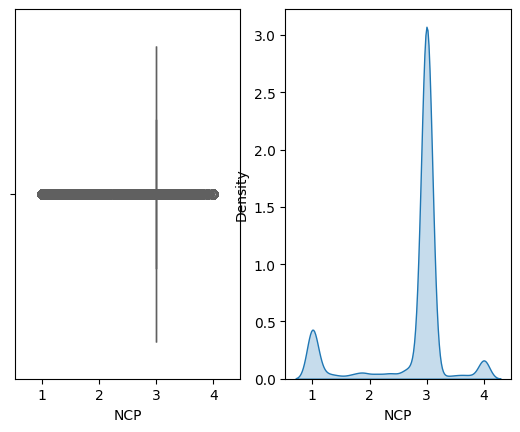

<Figure size 640x480 with 0 Axes>

<Figure size 2500x800 with 0 Axes>

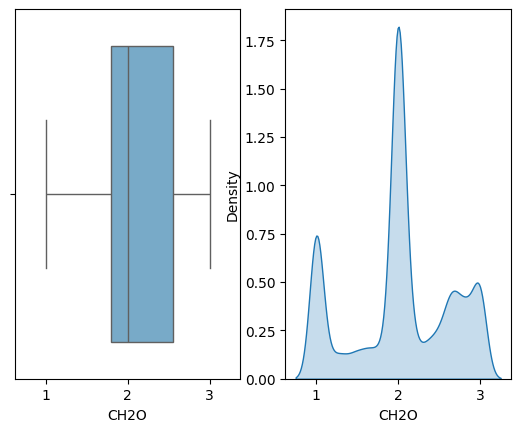

<Figure size 640x480 with 0 Axes>

<Figure size 2500x800 with 0 Axes>

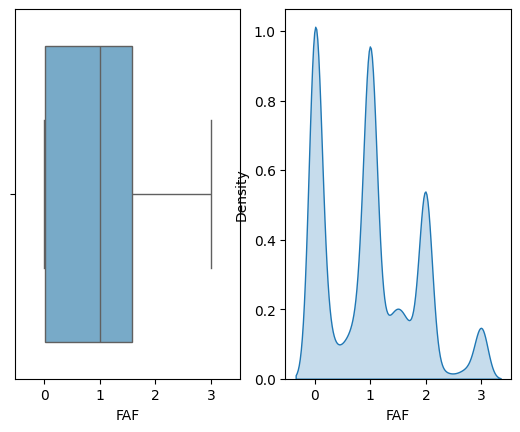

<Figure size 640x480 with 0 Axes>

<Figure size 2500x800 with 0 Axes>

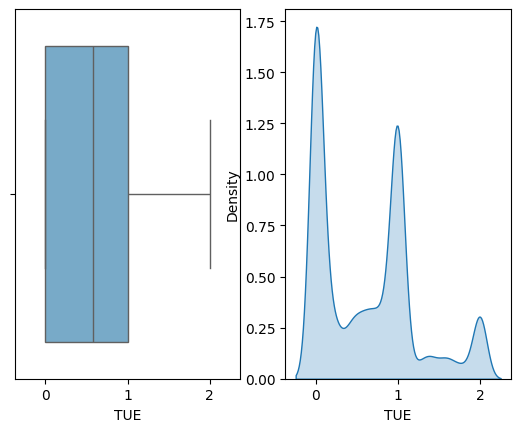

In [14]:
for col in list(num_columns.columns)[1:]:
    if num_columns[col].nunique() > 7:
        plt.figure();
        plt.figure(figsize=(25, 8))
        fig, (ax_box, ax_kde) = plt.subplots(ncols=2, sharex=True);
        plt.gca().set(xlabel=col, ylabel='Density');
        sns.boxplot(x = col, ax=ax_box, linewidth=1.0, palette='Blues', data=num_columns);  # Switched x to y
        sns.kdeplot(train_copy[col], ax=ax_kde, fill=True, palette='Blues');
        plt.show();
